In [4]:
import numpy as np
import networkx as nx
from typing import List
import copy
from itertools import combinations

"""
Convert the format of input tiles_id, this is important for building graphs because we want each node to have its own node id.
Args:
       tiles_id: The format of input tiles_id is something like: [(0, 1), (0, 2), ...], where the first element is the index of the tile, and the second element means rotation(0 for 0 degree, and 1 for 90 degree, 2 for 180 degree, 3 for 270 degree).
                That means there are 4 different tiles with the same index, but different rotation, so we have to unfold them to make sure each identical tile has its unqiue.
       size: The size of the grid, default is 81(9x9).
Returns:
        new_data:
        The ouput newdata will be something like: [0, 1, 2, 3, ..., N], where N is the number of all oriented tiles, for example, 0 is for the original (0,0), and 1 is for (0,1).
"""
def tiles2data(tiles_id, size=81):
    data = np.array(tiles_id)
    # Make the tile index start from 1 instead of 0.
    # This is due to some historical reasons, once for compatibility with my colleague's code, even it is not used at all anymore.
    # Humans always have differences, even on such smallest things.
    data[:, 0]+=1   # Make the tile index start from 1 instead of 0.
    # reshape the tile data to size x 2
    ndata=data.reshape(size,2)
    # the total tiles number is 26
    sum_tiles = 26
    # the total rotations is 4
    sum_rotations = 4
    # some boring initialization
    x = np.arange(1, sum_tiles+1)
    y = np.arange(sum_rotations)
    tiledict = {}
    count = 0
    # Create a mapping dictionary
    for i in x:
        for j in y:
            tiledict[str([i,j])] = count
            count+=1
    # Using the mapping dictionary to convert the input tiles_id to new_data
    newdata = []
    for i in ndata.tolist():
        newdata.append(tiledict[str(i)])
    return newdata

In [5]:
%reload_ext autoreload

# Generate a map

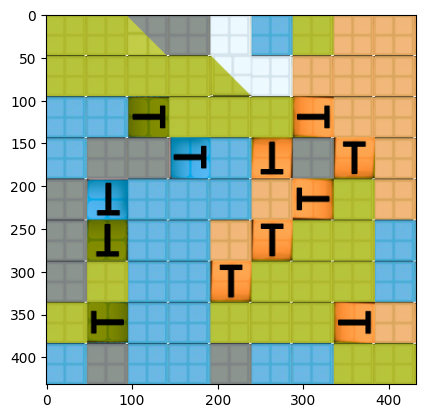

In [2]:
import fastwfc
import matplotlib.pyplot as plt

wfc_worker = fastwfc.XLandWFC("samples_99.xml")
ids,img = wfc_worker.generate(out_img=True)
plt.imshow(img)
plt.pause(0.01)

In [3]:
from map2graph import tiles2data, map2adjacency, get_connectity_dict
# con = get_connectity_dict(corner_extra_node=True)
adj = map2adjacency(tiles2data(ids), size=81, corner_extra_node=True)
print(adj.keys())
print(adj)


dict_keys([0, 1, 2.1, 2.2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13.1, 13.2, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])
{0: [TileClass(9, 8), TileClass(1, 8)], 1: [TileClass(10, 8), TileClass(0, 8), TileClass(2.1, 44.1)], 2.1: [TileClass(2.2, 44.2), TileClass(11, 8), TileClass(1, 8), TileClass(3, 0)], 2.2: [TileClass(2.1, 44.1), TileClass(11, 8), TileClass(1, 8), TileClass(3, 0)], 3: [TileClass(2.2, 44.2)], 4: [TileClass(13.2, 70.2), TileClass(3, 0), TileClass(5, 4)], 5: [], 6: [TileClass(5, 4)], 7: [TileClass(16, 12), TileClass(6, 8), TileClass(8, 12)], 8: [TileClass(17, 12), TileClass(7, 12)], 9: [TileClass(0, 8), TileClass(18, 4), TileClass(10, 8)], 10: [TileClass(1, 8), TileClass(19, 4), TileClass(9, 8), TileClass(11, 8)], 11: [TileClass(2.1, 44.1), TileClass(20, 9

In [4]:
from map2graph import tiles2data, map2digraph
import json
import networkx as nx
DG_orig  = map2digraph(tiles2data(ids), corner_extra_node=False)
DG_new  = map2digraph(tiles2data(ids), corner_extra_node=True)
print(DG_new.nodes.data())
# set all edge weights to 1
# for u,v in DG.edges():
    # DG[u][v]['weight'] = 1
print("Number of orig graph nodes: ", DG_orig.number_of_nodes())
print("Number of orig graph edges: ", DG_orig.number_of_edges())
print("Number of new graph nodes: ", DG_new.number_of_nodes())
print("Number of new graph edges: ", DG_new.number_of_edges())

[(0, {'tile': 8}), (1, {'tile': 8}), (2.1, {'tile': 44}), (2.2, {'tile': 44}), (3, {'tile': 0}), (4, {'tile': 20}), (5, {'tile': 4}), (6, {'tile': 8}), (7, {'tile': 12}), (8, {'tile': 12}), (9, {'tile': 8}), (10, {'tile': 8}), (11, {'tile': 8}), (12, {'tile': 8}), (13.1, {'tile': 70}), (13.2, {'tile': 70}), (14, {'tile': 20}), (15, {'tile': 12}), (16, {'tile': 12}), (17, {'tile': 12}), (18, {'tile': 4}), (19, {'tile': 4}), (20, {'tile': 91}), (21, {'tile': 8}), (22, {'tile': 8}), (23, {'tile': 8}), (24, {'tile': 95}), (25, {'tile': 12}), (26, {'tile': 12}), (27, {'tile': 4}), (28, {'tile': 0}), (29, {'tile': 0}), (30, {'tile': 87}), (31, {'tile': 4}), (32, {'tile': 94}), (33, {'tile': 0}), (34, {'tile': 92}), (35, {'tile': 12}), (36, {'tile': 0}), (37, {'tile': 86}), (38, {'tile': 4}), (39, {'tile': 4}), (40, {'tile': 4}), (41, {'tile': 12}), (42, {'tile': 93}), (43, {'tile': 8}), (44, {'tile': 12}), (45, {'tile': 0}), (46, {'tile': 90}), (47, {'tile': 4}), (48, {'tile': 4}), (49, {'ti

# 检查测试新的图建法是否存在问题

In [5]:
from map2graph import get_all_pair_shortest_path
import networkx as nx
orig_path = get_all_pair_shortest_path(DG_orig)
orig_path2 = dict(nx.all_pairs_shortest_path(DG_orig))
new_path = get_all_pair_shortest_path(DG_new)
new_path2 = dict(nx.all_pairs_shortest_path(DG_new))
new_path3 = dict(nx.all_pairs_dijkstra_path(DG_new))
orig_list = []
path2_list = []
path3_list = []
for n in DG_orig.nodes():
    for key in orig_path2[n].keys():
        orig_list.append(orig_path2[n][key])
for n in DG_new.nodes():
    for key in new_path2[n].keys():
        path2_list.append(new_path2[n][key])
        path3_list.append(new_path3[n][key])
print(len(orig_path))
print(len(orig_list))
print(len(new_path))
print(len(path2_list))
print(len(path3_list))

3770
3770
4081
4081
4081


In [6]:
all_pair_shortest_paths_length = nx.all_pairs_shortest_path_length(DG_new)
all_shortest_paths_length = []
for key, value in all_pair_shortest_paths_length:
    for k, v in value.items():
        all_shortest_paths_length.append(v)
print(all_shortest_paths_length)

[0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 16, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 

[1 2 2 ... 0 0 0]
6561
[1 2 2 ... 0 0 0]
6889


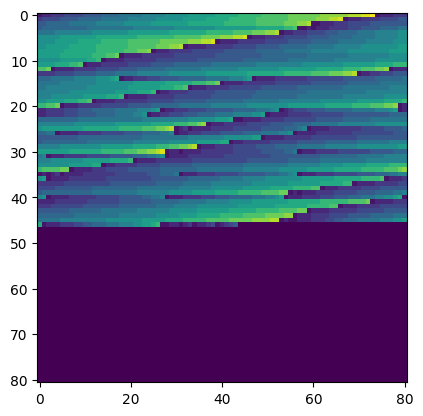

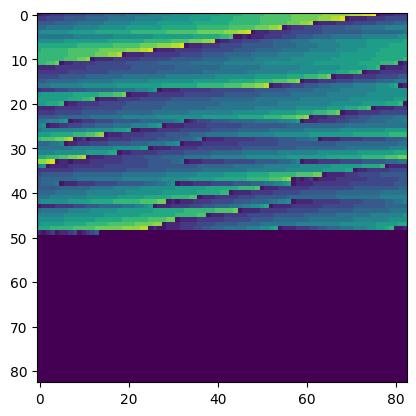

In [7]:
from map2graph import get_map_shortest_length_dist
orig = get_map_shortest_length_dist(DG_orig, norm=False, corner_extra_node=False)
print(orig)
print(len(orig))
new = get_map_shortest_length_dist(DG_new, norm=False, corner_extra_node=True)
print(new)
print(len(new))
import matplotlib.pyplot as plt
# limt x as int
orig_img = orig.reshape(len(DG_orig), len(DG_orig))
new_img = new.reshape(len(DG_new), len(DG_new))
plt.imshow(orig_img)
plt.pause(0.01)
plt.imshow(new_img)
plt.pause(0.01)
import numpy as np
if orig_img.shape == new_img.shape:
    diff = np.abs(orig_img - new_img)
    plt.imshow(diff)
    plt.pause(0.01)